In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, classification_report 

In [2]:
df=pd.read_csv(r"/Users/mohammadehsan/Desktop/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
old_df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Fare"]].copy()


In [4]:
old_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Fare        float64
dtype: object

In [5]:
old_df.loc[:, "Age"]=old_df["Age"].fillna(0).astype(int)

In [6]:
old_df["Sex"]=old_df["Sex"].map({"male":0,"female":1})

In [7]:
old_df["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [9]:
X=old_df[["Pclass", "Sex", "Age", "SibSp", "Fare"]]
y=old_df["Survived"]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape[0])
print(y_train.shape[0])


712
712


In [11]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)*100 #جدا جدا در ۱۰۰ ضرب کردیم برای تبدیل به درصد
f1=f1_score(y_test,y_pred) *100 #جدا جدا در ۱۰۰ ضرب کردیم برای تبدیل به درصد
print(f"accuracy is:{accuracy:0.2f}\n f1 is:{f1:0.2f}")
report=classification_report(y_test,y_pred,target_names=["غرق شده","زنده مانده"])
print(report)

accuracy is:78.21
 f1 is:72.73
              precision    recall  f1-score   support

     غرق شده       0.80      0.84      0.82       105
  زنده مانده       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



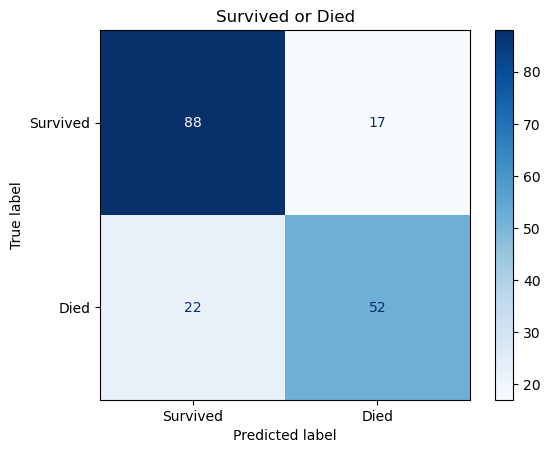

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Survived","Died"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Survived or Died")
plt.show()
